In [23]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_features, learning_rate=0.01, n_iterations=5000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.zeros((3, n_features))
        self.bias = np.zeros(3)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                scores = np.dot(self.weights, X[i]) + self.bias
                predicted = np.argmax(scores)
                if predicted != y[i]:
                    self.weights[y[i]] += self.learning_rate * X[i]
                    self.bias[y[i]] += self.learning_rate
                    self.weights[predicted] -= self.learning_rate * X[i]
                    self.bias[predicted] -= self.learning_rate

    def predict(self, X):
        scores = np.dot(self.weights, X.T) + self.bias.reshape(-1, 1)
        return np.argmax(scores, axis=0)

# Example usage:
# Generate some sample data
np.random.seed(1)
X = np.random.rand(100, 2)
y = np.random.randint(0, 3, 100)

x_train = np.load('db1/X_train.npy'); y_train = np.load('db1/y_train.npy')
x_test = np.load('db1/X_test.npy'); y_test = np.load('db1/y_test.npy')

# Create the perceptron model and train it
model = Perceptron(n_features=13)
model.fit(x_train, y_train)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = x_test[:, 0].min() - 0.1, x_test[:, 0].max() + 0.1
y_min, y_max = x_test[:, 1].min() - 0.1, x_test[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

#Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


ValueError: shapes (3,13) and (2,155561) not aligned: 13 (dim 1) != 2 (dim 0)

In [136]:
import numpy as np

class Perceptron:
    def __init__(self, n_features, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.zeros((3, n_features))
        self.bias = np.zeros(3)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                scores = np.dot(self.weights, X[i]) + self.bias
                predicted = np.argmax(scores)
                if predicted != y[i]:
                    self.weights[y[i]] += self.learning_rate * X[i]
                    self.bias[y[i]] += self.learning_rate
                    self.weights[predicted] -= self.learning_rate * X[i]
                    self.bias[predicted] -= self.learning_rate

    def predict(self, X):
        scores = np.dot(self.weights, X.T) + self.bias.reshape(-1, 1)
        return np.argmax(scores, axis=0)

# Example usage:
# Generate some sample data
X = np.random.rand(100, 5)
y = np.random.randint(0, 3, 100)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

X_train = np.load('db1/X_train.npy'); y_train = np.load('db1/y_train.npy')
X_test = np.load('db1/X_test.npy'); y_test = np.load('db1/y_test.npy')

# Create the perceptron model and train it
model = Perceptron(n_features=13)
model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Print the confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for true_label, predicted_label in zip(y_test, y_pred):
    confusion_matrix[true_label][predicted_label] += 1
print("Confusion matrix:")
print(confusion_matrix)

# Print the classification report
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7222222222222222
Confusion matrix:
[[18  1  0]
 [ 0 21  0]
 [ 2 12  0]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.62      1.00      0.76        21
           2       0.00      0.00      0.00        14

    accuracy                           0.72        54
   macro avg       0.51      0.65      0.56        54
weighted avg       0.56      0.72      0.62        54



c:\Users\Tayco Murilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tayco Murilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tayco Murilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

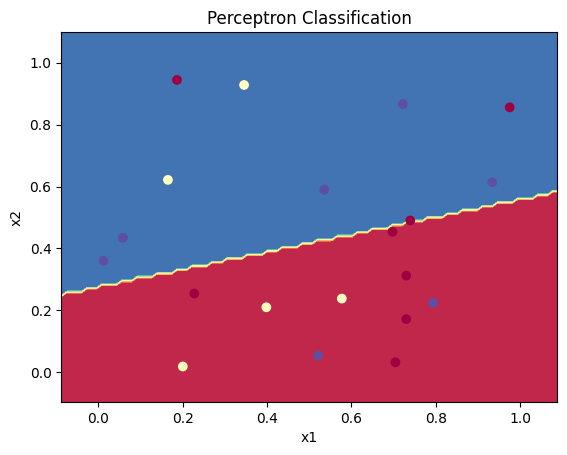

In [139]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_features, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.zeros((3, n_features))
        self.bias = np.zeros(3)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                scores = np.dot(self.weights, X[i]) + self.bias
                predicted = np.argmax(scores)
                if predicted != y[i]:
                    self.weights[y[i]] += self.learning_rate * X[i]
                    self.bias[y[i]] += self.learning_rate
                    self.weights[predicted] -= self.learning_rate * X[i]
                    self.bias[predicted] -= self.learning_rate

    def predict(self, X):
        scores = np.dot(self.weights, X.T) + self.bias.reshape(-1, 1)
        return np.argmax(scores, axis=0)

# Example usage:
# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.randint(0, 3, 100)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Create the perceptron model and train it
model = Perceptron(n_features=2)
model.fit(X_train, y_train)

# Plot the classification results
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Classification')
plt.show()


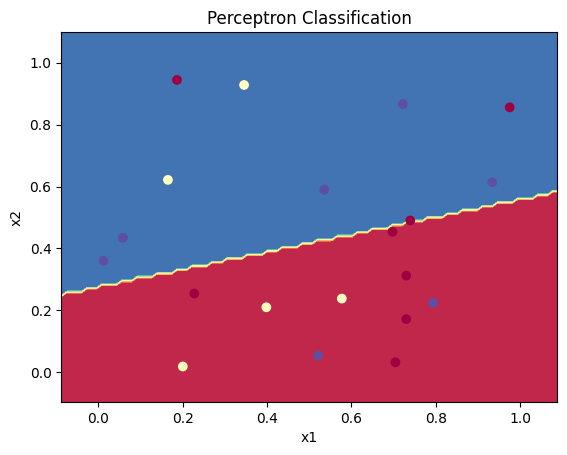

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_features, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.zeros((3, n_features))
        self.bias = np.zeros(3)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                scores = np.dot(self.weights, X[i]) + self.bias
                predicted = np.argmax(scores)
                if predicted != y[i]:
                    self.weights[y[i]] += self.learning_rate * X[i]
                    self.bias[y[i]] += self.learning_rate
                    self.weights[predicted] -= self.learning_rate * X[i]
                    self.bias[predicted] -= self.learning_rate

    def predict(self, X):
        scores = np.dot(self.weights, X.T) + self.bias.reshape(-1, 1)
        return np.argmax(scores, axis=0)

# Example usage:
# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.randint(0, 3, 100)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Create the perceptron model and train it
model = Perceptron(n_features=2)
model.fit(X_train, y_train)

# Plot the classification results
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Classification')
plt.show()
